In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [179]:
df = pd.read_excel("C:\\Users\\Anthony\\Pictures\\ml\\supervised-learning\\customer-similarity-analysis\\data\\JULY-SALES.xlsx")
df.head()

,A/C,Customer,Date,P,S,B,200g,O.P.,800g,600g,KATIKATI,MANDAZI,DOUGHNUTS,50-50 SLICED,MANDO FAMILY PACK,4 Square,Qty,AVG
0,55,LUCY WAIRIMU KAIRU (055),2025-12-07,0,8448,2837,5468,0,0,433,0,0,0,-30.0,0,0,17156.0,2450.857143
1,57,JAMES MWANGI (057),2025-12-07,3216,34099,13291,22010,0,0,4946,0,0,0,3.0,0,3735,81300.0,11614.285714
2,62,ANTONY MWANGI (062),2025-12-07,401,20241,7343,18969,0,66,9168,0,0,0,-16.0,0,660,56832.0,8118.857143
3,63,NASHON KYULE (063),2025-12-07,2031,39511,8469,18263,0,187,452,0,0,0,45.0,0,0,68958.0,9851.142857
4,82,PATRICK WAWERU GICHUHI (082),2025-12-07,1221,8553,2825,8632,0,78,190,0,0,0,-5.0,0,1290,22784.0,3254.857143


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   A/C                892 non-null    int64         
 1   Customer           892 non-null    object        
 2   Date               892 non-null    datetime64[ns]
 3   P                  892 non-null    int64         
 4   S                  892 non-null    int64         
 5   B                  892 non-null    int64         
 6   200g               892 non-null    int64         
 7   O.P.               892 non-null    int64         
 8   800g               892 non-null    int64         
 9   600g               892 non-null    int64         
 10  KATIKATI           892 non-null    int64         
 11  MANDAZI            892 non-null    int64         
 12  DOUGHNUTS          892 non-null    int64         
 13  50-50 SLICED       892 non-null    float64       
 14  MANDO FAMI

In [181]:
df.drop(columns=['Date'], inplace=True)

In [182]:
df.columns

Index(['A/C', 'Customer', 'P', 'S', 'B', '200g', 'O.P.', '800g', '600g',
       'KATIKATI', 'MANDAZI', 'DOUGHNUTS', '50-50 SLICED', 'MANDO FAMILY PACK',
       '4 Square', 'Qty', 'AVG'],
      dtype='object')

In [183]:
df.isna().sum()

A/C                  0
Customer             0
P                    0
S                    0
B                    0
200g                 0
O.P.                 0
800g                 0
600g                 0
KATIKATI             0
MANDAZI              0
DOUGHNUTS            0
50-50 SLICED         0
MANDO FAMILY PACK    0
4 Square             0
Qty                  0
AVG                  0
dtype: int64

In [184]:
df.isnull().sum()

A/C                  0
Customer             0
P                    0
S                    0
B                    0
200g                 0
O.P.                 0
800g                 0
600g                 0
KATIKATI             0
MANDAZI              0
DOUGHNUTS            0
50-50 SLICED         0
MANDO FAMILY PACK    0
4 Square             0
Qty                  0
AVG                  0
dtype: int64

In [185]:
df.duplicated().sum()

np.int64(0)

In [186]:
df.columns

Index(['A/C', 'Customer', 'P', 'S', 'B', '200g', 'O.P.', '800g', '600g',
       'KATIKATI', 'MANDAZI', 'DOUGHNUTS', '50-50 SLICED', 'MANDO FAMILY PACK',
       '4 Square', 'Qty', 'AVG'],
      dtype='object')

In [187]:
df.shape

(892, 17)

In [188]:
customer_info = df[['Customer', 'A/C']].copy()

In [189]:
# Check data structure
print("Customer info shape:", customer_info.shape)
print("\nUnique customers:", customer_info['Customer'].nunique())
print("Unique A/C values:", customer_info['A/C'].nunique())
print("\nSample customer info:")
print(customer_info.head(10))

Customer info shape: (892, 2)

Unique customers: 879
Unique A/C values: 832

Sample customer info:
                       Customer  A/C
0      LUCY WAIRIMU KAIRU (055)   55
1            JAMES MWANGI (057)   57
2           ANTONY MWANGI (062)   62
3            NASHON KYULE (063)   63
4  PATRICK WAWERU GICHUHI (082)   82
5          GERALD GICHUKI (100)  100
6           PETER KARANJA (101)  101
7      PURITY WANJA NGATIA(120)  120
8            EVANS MOSETI (153)  153
9     JOSEPH MWANGI MURUKU(163)  163


In [190]:
df = df.drop(['Customer', 'A/C', 'Qty', 'AVG'], axis=1)

In [191]:
df.describe()

,P,S,B,200g,O.P.,800g,600g,KATIKATI,MANDAZI,DOUGHNUTS,50-50 SLICED,MANDO FAMILY PACK,4 Square
count,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.0,892.000000,892.000000,892.000000,892.00000,892.000000
mean,127.994395,3283.809417,1230.921525,3521.662556,56.030269,177.126682,750.656951,0.0,56.539238,19.256726,23.292595,3.55157,265.964126
std,824.259457,5819.641524,2114.584968,8083.026779,188.360045,284.473465,1037.226056,0.0,253.492794,83.398091,61.978797,17.52403,1269.432696
min,-30.000000,-75.000000,-30.000000,-24.000000,-23.000000,-20.000000,-63.000000,0.0,-14.000000,-9.000000,-60.000000,-15.00000,-60.000000
25%,0.000000,298.750000,161.000000,0.000000,0.000000,0.000000,45.750000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,864.000000,423.000000,271.500000,0.000000,81.000000,455.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,3644.250000,1431.500000,3698.000000,50.000000,257.250000,995.500000,0.0,38.250000,0.000000,20.750000,0.00000,120.000000
max,19035.000000,42660.000000,17831.000000,83393.000000,3208.000000,2987.000000,9168.000000,0.0,4740.000000,1480.000000,560.000000,280.00000,23700.000000


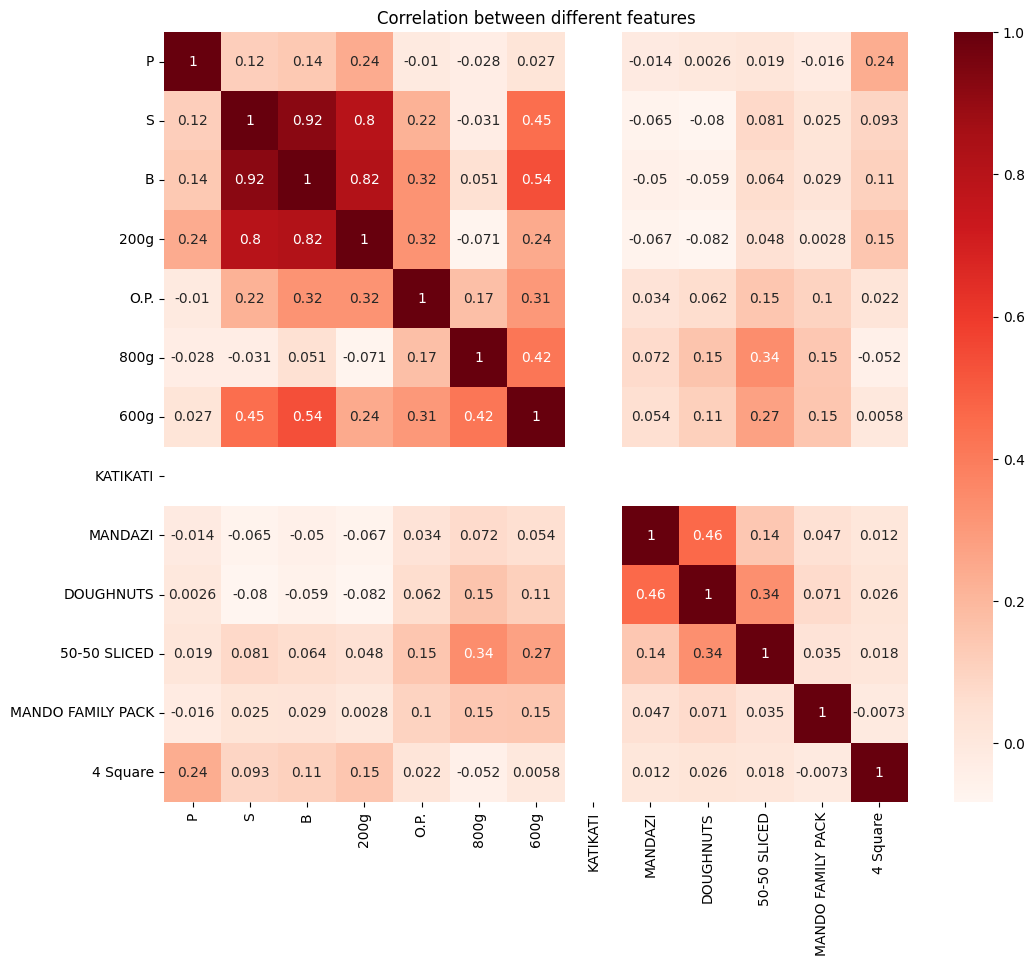

In [192]:
# correlation of features before scaling
plt.figure(figsize=(12,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
plt.title("Correlation between different features")
plt.show()

In [193]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,P,S,B,200g,O.P.,800g,600g,KATIKATI,MANDAZI,DOUGHNUTS,50-50 SLICED,MANDO FAMILY PACK,4 Square
0,-0.155371,0.887870,0.759950,0.240928,-0.297631,-0.622997,-0.306428,0.0,-0.223166,-0.231031,-0.860334,-0.202782,-0.209632
1,3.748502,5.298003,5.706484,2.288587,-0.297631,-0.622997,4.047041,0.0,-0.223166,-0.231031,-0.327596,-0.202782,2.734278
2,0.331399,2.915421,2.892060,1.912155,-0.297631,-0.390859,8.119797,0.0,-0.223166,-0.231031,-0.634324,-0.202782,0.310577
3,2.310041,6.228479,3.424851,1.824763,-0.297631,0.034727,-0.288100,0.0,-0.223166,-0.231031,0.350436,-0.202782,-0.209632
4,1.326789,0.905923,0.754272,0.632585,-0.297631,-0.348652,-0.540838,0.0,-0.223166,-0.231031,-0.456744,-0.202782,0.807140


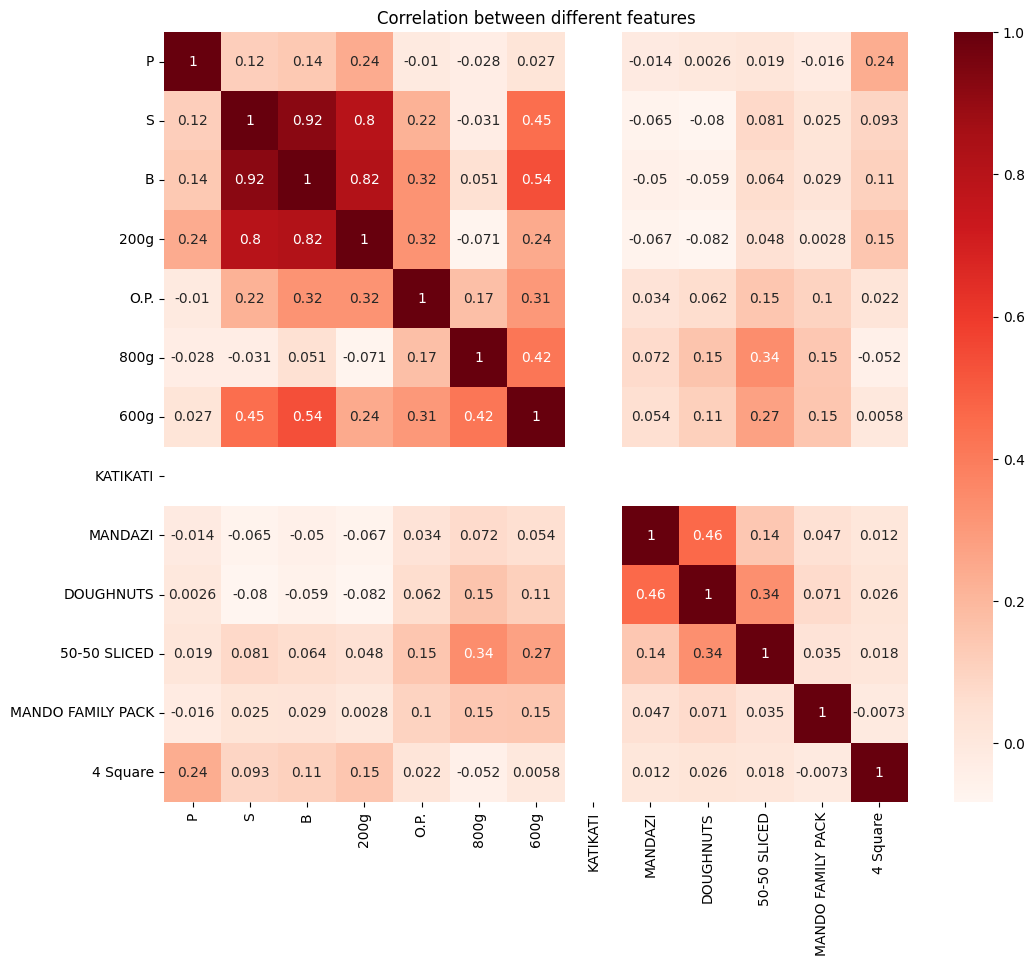

In [194]:
# correlation of features
plt.figure(figsize=(12,10))
correlation = scaled_df.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
plt.title("Correlation between different features")
plt.show()

In [195]:
scaled_df.columns

Index(['P', 'S', 'B', '200g', 'O.P.', '800g', '600g', 'KATIKATI', 'MANDAZI',
       'DOUGHNUTS', '50-50 SLICED', 'MANDO FAMILY PACK', '4 Square'],
      dtype='object')